<h3>Mobile Phone Price Tag Prediction</h3>

We want to start a new mobile phone manufacturing company and we would like to decide the price range of the mobile phone. 

So we have done market studies and collected information of around 2000 mobile phones with 4 levels of price range:

(0 being lowest, 3 being higest price tag)


The dataset contains the information about features of mobile phones and corresponding sales price tag  ( 4 levels).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics


In [16]:
train = pd.read_csv('car_data/train.csv') #loading the train.csv file 
test = pd.read_csv('car_data/test.csv')   #loading the test.csv file 
    

In [17]:
#checking the data shape and size 
train.shape

(2000, 21)

In [18]:
test.shape

(1000, 21)

In [19]:
train.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [20]:
test.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


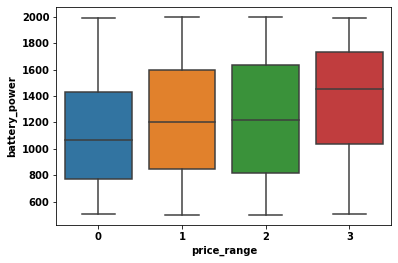

In [21]:
#trying to check the distributaion of mean 
sn.boxplot(x = 'price_range', y = 'battery_power', data = train);

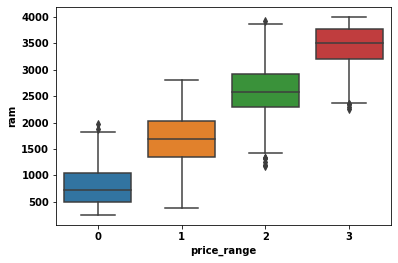

In [22]:
#trying to check the distribuation of ram features  
sn.boxplot(x = 'price_range', y = 'ram', data = train);

In [25]:
#checking the data types of train.csv
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [26]:
train.price_range = train.price_range.astype('category')

In [28]:
print(test.shape)
print(train.shape)

(1000, 21)
(2000, 21)


## Modelling

In [31]:
#dropig the prediction varible 
X = train.drop(['price_range'], axis = 1)
print(X.shape)

(2000, 20)


In [32]:
#keeping the predicating varaible to y
y = train['price_range']
print(y.shape)

(2000,)


In [33]:
#train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)


In [35]:
print("X_train shape : ",X_train.shape)
print("X_test shape : ",X_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

X_train shape :  (1600, 20)
X_test shape :  (400, 20)
y_train shape :  (1600,)
y_test shape :  (400,)


In [36]:
#calling thee KNN classifier with k value 5
knn = KNeighborsClassifier(n_neighbors= 5)
#fitting the model X_train and y_train data 
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
#predicting the value on X test 
y_pred = knn.predict(X_test)

In [38]:
#calculating the accruracy 
metrics.accuracy_score(y_test, y_pred)

0.9275

## cross-vaidation

In [39]:
#performing the 10 cross validation 
knn = KNeighborsClassifier(n_neighbors= 5)
#calculating the scores for each model
scores = cross_val_score(knn, X, y , cv = 10, scoring= 'accuracy')

In [40]:
print(scores)

[0.9   0.94  0.92  0.935 0.925 0.95  0.915 0.915 0.915 0.92 ]


In [41]:
print(scores.mean())

0.9235000000000001


1. Split the data into X equal paritions / folds

2. use fold 1 as the test set and the (X-1) folds as train set

3.  Calculate test accuracy

4.  Repeat these steps 2, 3 for X times

5. Use the average of all these X testing accuracies as the estimate of sample accuracy

In [51]:
k_range = range(1, 41)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn, X, y , cv = 5, scoring= 'accuracy')
    print("The value of k and accuracy ",k,scores.mean())
    k_scores.append(scores.mean())
    

The value of k and accuracy  1 0.908
The value of k and accuracy  2 0.8950000000000001
The value of k and accuracy  3 0.9195
The value of k and accuracy  4 0.9094999999999999
The value of k and accuracy  5 0.9195
The value of k and accuracy  6 0.9205
The value of k and accuracy  7 0.925
The value of k and accuracy  8 0.9245000000000001
The value of k and accuracy  9 0.931
The value of k and accuracy  10 0.9315
The value of k and accuracy  11 0.9345000000000001
The value of k and accuracy  12 0.93
The value of k and accuracy  13 0.9339999999999999
The value of k and accuracy  14 0.929
The value of k and accuracy  15 0.9299999999999999
The value of k and accuracy  16 0.9279999999999999
The value of k and accuracy  17 0.9315
The value of k and accuracy  18 0.9305
The value of k and accuracy  19 0.932
The value of k and accuracy  20 0.93
The value of k and accuracy  21 0.9295000000000002
The value of k and accuracy  22 0.9295000000000002
The value of k and accuracy  23 0.9325000000000001
T

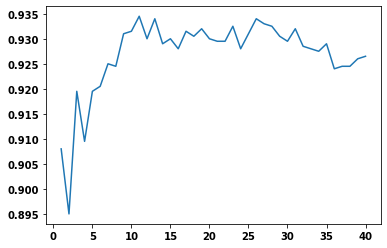

In [52]:
#ploting the k value and accuracy 
sn.lineplot(x = k_range, y = k_scores);
